## Notebook to analyze the training loss

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import cm
from scipy.stats import zscore

In [121]:
out = 5
smooth = 0.99

def load_loss(txt, smooth, out):
    ## Read the file (txt)
    file = open(txt, "r")
    contents = file.read()
    dic = ast.literal_eval(contents)
    file.close()
    
    #Create the two dataframes
    df = pd.DataFrame.from_dict(dic)
    df2 = df.ewm(alpha=(1 - smooth)).mean()

    abs_z_scores = np.abs(zscore(df))
    filtered_entries = (abs_z_scores < out).all(axis=1)
    df = df[filtered_entries]
    
    return df, df2
    

In [122]:
df,df2 = load_loss("save_loss.txt",smooth,out)
dfv9,df2v9 = load_loss("save_loss_v9.txt",smooth,out)

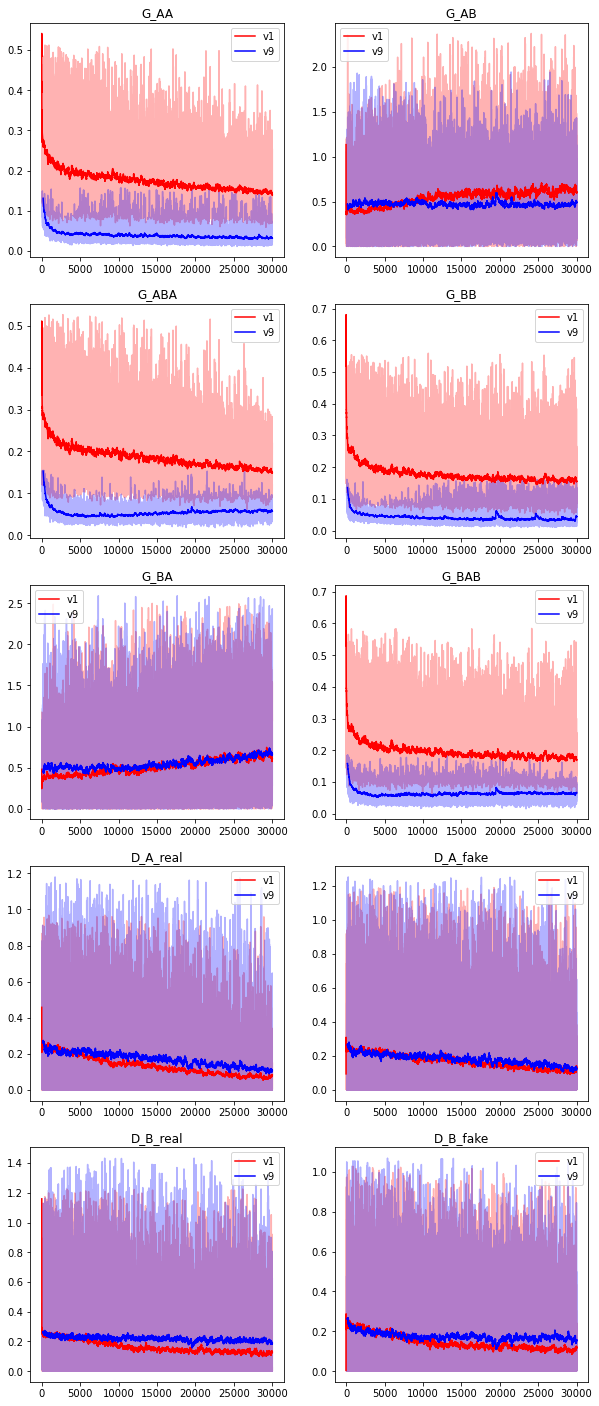

In [123]:
plt.figure(figsize=(10,25))

color=cm.rainbow(np.linspace(0,1,10))
color2=cm.terrain(np.linspace(0,1,10))

for i, key in enumerate(df):
    plt.subplot(5,2,i+1)
    plt.title(key)
    
    plt.plot(df[key],c='r',alpha=0.3)
    plt.plot(dfv9[key],c='b',alpha=0.3)
    
    plt.plot(df2[key],label='v1',c='r')
    plt.plot(dfv92[key],label='v9',c='b')
    
    plt.legend()
